In [63]:
# This script is for DNN
# Take Dataset3 BUF for example

## DNN Test

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Dataset3 BUF 70%
X_sociodemo_test_passed = pd.read_csv("../Data/04 Data for RF and DNN Optimal Parameters Search/04 70%_Buf_1000/X_sociodemo_train.csv", index_col = 'GEOID')
y = pd.read_csv("../Data/04 Data for RF and DNN Optimal Parameters Search/04 70%_Buf_1000/y_train.csv", index_col = 'GEOID', squeeze=True)

In [3]:
len(X_sociodemo_test_passed)

54

In [4]:
# Standardization function
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

In [5]:
# standardization
X_sociodemo_test_passed_stats = X_sociodemo_test_passed.describe().transpose()
X_sociodemo_std_test_passed = standarize_data(X_sociodemo_test_passed, X_sociodemo_test_passed_stats)

In [6]:
X_sociodemo_std_test_passed.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% age >=60,% <highschool,median income,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density
GEOID,,,,,,,,,,,,,,,,,,,,,
36029001100,-0.949024,0.931662,-0.254877,-0.274294,-0.065354,0.969873,0.068404,-0.297743,-0.126464,-0.605150,...,0.516480,0.047598,0.096195,-0.206016,-0.732906,-0.708308,-0.419366,-0.258832,-0.401786,-0.729397
36029005801,-0.788215,-0.030216,-0.122796,-0.274294,1.209537,-0.340005,-0.636459,-0.590743,-0.290258,-0.617114,...,-0.568880,0.510494,-0.637348,0.031092,0.781262,0.728337,-0.459006,-0.258832,0.149749,1.360566
36029006602,-0.530623,-0.007714,-0.366858,-0.274294,-0.636127,0.269177,0.010341,0.090229,-0.529358,0.906156,...,2.545102,-0.909721,1.023669,-0.602295,-1.320266,-0.531192,1.796286,-0.258832,0.606925,1.487479
36029000500,-0.931362,-0.446201,-0.648039,-0.274294,0.360364,-0.650409,0.499005,-1.115559,-0.307514,-0.926282,...,0.566505,0.791802,-0.606574,-0.356076,0.720056,-0.139861,-0.664506,-0.258832,-1.583549,-1.716744
36029006902,-0.651846,0.160878,1.046691,-0.274294,1.036801,0.641801,0.354914,-0.256385,1.339671,-0.284849,...,-0.072012,1.171093,-0.630184,0.210962,0.595261,0.171160,0.094907,-0.258832,0.388905,2.031581


In [7]:
X_sociodemo_std_test_passed.shape

(54, 21)

In [8]:
# Quick run before tuning hyperparameters 
tf.random.set_seed(42)
# https://cnbeining.github.io/deep-learning-with-python-cn/4-advanced-multi-layer-perceptrons-and-keras/ch16-reduce-overfitting-with-dropout-regularization.html
dnn_model = keras.models.Sequential([
    keras.layers.Dense(256,activation="relu"), # Dense means fully connected.
    keras.layers.Dropout(0.2), # prevent overfitting
    keras.layers.Dense(128,activation="relu"),
    #keras.layers.Dropout(0.2),
    #keras.layers.Dense(128,activation="relu"),
    #keras.layers.Dropout(0.2),
    #keras.layers.Dense(64,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer="adam", loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])

In [9]:
history = dnn_model.fit(x=X_sociodemo_std_test_passed, y=y, validation_split=0.1, epochs=50, verbose=2)

Epoch 1/50
2/2 - 0s - loss: 37.8912 - mean_squared_error: 1484.5590 - val_loss: 33.3948 - val_mean_squared_error: 1154.1283 - 410ms/epoch - 205ms/step
Epoch 2/50
2/2 - 0s - loss: 37.4909 - mean_squared_error: 1454.9156 - val_loss: 32.9953 - val_mean_squared_error: 1128.1552 - 23ms/epoch - 11ms/step
Epoch 3/50
2/2 - 0s - loss: 37.0816 - mean_squared_error: 1424.2979 - val_loss: 32.5387 - val_mean_squared_error: 1098.8890 - 18ms/epoch - 9ms/step
Epoch 4/50
2/2 - 0s - loss: 36.6188 - mean_squared_error: 1391.6310 - val_loss: 31.9780 - val_mean_squared_error: 1063.4543 - 19ms/epoch - 9ms/step
Epoch 5/50
2/2 - 0s - loss: 36.0650 - mean_squared_error: 1351.8820 - val_loss: 31.3347 - val_mean_squared_error: 1023.6941 - 17ms/epoch - 8ms/step
Epoch 6/50
2/2 - 0s - loss: 35.4205 - mean_squared_error: 1304.9872 - val_loss: 30.5769 - val_mean_squared_error: 978.0779 - 17ms/epoch - 8ms/step
Epoch 7/50
2/2 - 0s - loss: 34.6384 - mean_squared_error: 1251.0878 - val_loss: 29.6824 - val_mean_squared_er

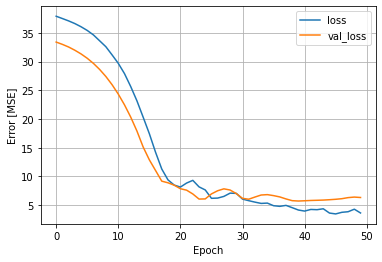

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)

In [11]:
#make prediction
y_pred = dnn_model.predict(X_sociodemo_std_test_passed)

#evaluate with groud truth
y_pred_r2 = r2_score(y, y_pred)
y_pred_rsme = mean_squared_error(y, y_pred, squared=False)

print(y_pred_r2)
print(y_pred_rsme)

0.496944321595435
4.99767866762518


In [12]:
# Quick run before tuning hyperparameters 2
tf.random.set_seed(42)
# https://cnbeining.github.io/deep-learning-with-python-cn/4-advanced-multi-layer-perceptrons-and-keras/ch16-reduce-overfitting-with-dropout-regularization.html
dnn_model = keras.models.Sequential([
    #keras.layers.Dense(256,activation="relu"), # Dense means fully connected.
    #keras.layers.Dropout(0.2), # prevent overfitting
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(32,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer="adam", loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])

In [13]:
history = dnn_model.fit(x=X_sociodemo_std_test_passed, y=y, validation_split=0.1, epochs=50, verbose=2)

Epoch 1/50
2/2 - 0s - loss: 1485.1136 - mean_squared_error: 1485.1136 - val_loss: 1159.6823 - val_mean_squared_error: 1159.6823 - 478ms/epoch - 239ms/step
Epoch 2/50
2/2 - 0s - loss: 1460.4789 - mean_squared_error: 1460.4789 - val_loss: 1135.2971 - val_mean_squared_error: 1135.2971 - 26ms/epoch - 13ms/step
Epoch 3/50
2/2 - 0s - loss: 1429.2451 - mean_squared_error: 1429.2451 - val_loss: 1104.5603 - val_mean_squared_error: 1104.5603 - 20ms/epoch - 10ms/step
Epoch 4/50
2/2 - 0s - loss: 1393.2305 - mean_squared_error: 1393.2305 - val_loss: 1067.1475 - val_mean_squared_error: 1067.1475 - 19ms/epoch - 9ms/step
Epoch 5/50
2/2 - 0s - loss: 1351.8011 - mean_squared_error: 1351.8011 - val_loss: 1022.3005 - val_mean_squared_error: 1022.3005 - 20ms/epoch - 10ms/step
Epoch 6/50
2/2 - 0s - loss: 1304.7444 - mean_squared_error: 1304.7444 - val_loss: 969.9948 - val_mean_squared_error: 969.9948 - 18ms/epoch - 9ms/step
Epoch 7/50
2/2 - 0s - loss: 1233.9617 - mean_squared_error: 1233.9617 - val_loss: 90

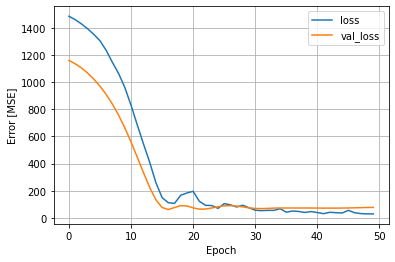

In [14]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)

In [15]:
#make prediction
y_pred = dnn_model.predict(X_sociodemo_std_test_passed)

#evaluate with groud truth
y_pred_r2 = r2_score(y, y_pred)
y_pred_rsme = mean_squared_error(y, y_pred, squared=False)

print(y_pred_r2)
print(y_pred_rsme)

0.46314869915307233
5.162823833375775


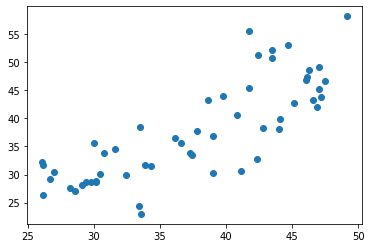

In [17]:
plt.scatter(y, y_pred)

## Hyperparameter tuning

In [12]:
import os

In [13]:
def build_model(hp):
    model = keras.models.Sequential()
    
    for i in range(hp.Int("num_layer",1,10)):
        model.add(keras.layers.Dense(units=hp.Int("neuron_"+str(i),16,256, step=16), activation="relu"))
        
        for j in range(hp.Int("num_drop_layer_"+str(i),0,1)):
            model.add(keras.layers.Dropout(0.2))
            
    model.add(keras.layers.Dense(1))
    
    model.compile(optimizer="adam",loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])
    
    return model

tuner = RandomSearch(build_model, objective="val_loss", max_trials=50, executions_per_trial=5 ,seed=42, overwrite=True, directory=os.path.normpath('C:/Users/yhu42/yhu42/hyper')) # directory=os.path.normpath('C:/Users/ryanz/Desktop/')
# Integer, the total number of trials (model configurations) to test at most. Note that the oracle may interrupt the search before `max_trial` models have been tested if the search space has been exhausted. Defaults to 10.
# The number of models that should be built and fit for each trial.

In [14]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
num_layer (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 10, 'step': 1, 'sampling': None}
neuron_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
num_drop_layer_0 (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 1, 'step': 1, 'sampling': None}


In [15]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
tuner.search(X_sociodemo_std_test_passed, y, validation_split=0.1, epochs=50, callbacks=[early_stop], verbose=2)

Trial 50 Complete [00h 00m 09s]
val_loss: 6.853253936767578

Best val_loss So Far: 5.433618545532227
Total elapsed time: 00h 06m 45s
INFO:tensorflow:Oracle triggered exit


In [16]:
tuner.results_summary()

Results summary
Results in C:\Users\yhu42\yhu42\hyper\untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
num_layer: 2
neuron_0: 160
num_drop_layer_0: 1
neuron_1: 224
num_drop_layer_1: 0
neuron_2: 80
num_drop_layer_2: 1
neuron_3: 240
num_drop_layer_3: 1
neuron_4: 96
num_drop_layer_4: 1
neuron_5: 176
num_drop_layer_5: 0
neuron_6: 176
num_drop_layer_6: 0
neuron_7: 80
num_drop_layer_7: 0
neuron_8: 224
num_drop_layer_8: 0
neuron_9: 160
num_drop_layer_9: 0
Score: 5.433618545532227
Trial summary
Hyperparameters:
num_layer: 2
neuron_0: 192
num_drop_layer_0: 0
neuron_1: 240
num_drop_layer_1: 1
neuron_2: 224
num_drop_layer_2: 1
neuron_3: 144
num_drop_layer_3: 0
neuron_4: 48
num_drop_layer_4: 0
neuron_5: 96
num_drop_layer_5: 1
neuron_6: 208
num_drop_layer_6: 0
neuron_7: 144
num_drop_layer_7: 0
neuron_8: 64
num_drop_layer_8: 0
neuron_9: 160
num_drop_layer_9: 0
Score: 5.461191177368164
Trial summary
Hyperparameters:
num_layer: 2
neuron

In [17]:
best_hps = tuner.get_best_hyperparameters()[0]
layer_count = best_hps.get("num_layer")
print("The number of layer is: "+ str(layer_count))
for i in range(layer_count):
  print("Neuron for layer_"+str(i)+" is: "+str(best_hps.get("neuron_"+str(i))))
  print("Dropout for layer_"+str(i)+" is: "+str(best_hps.get("num_drop_layer_"+str(i))))

The number of layer is: 2
Neuron for layer_0 is: 160
Dropout for layer_0 is: 1
Neuron for layer_1 is: 224
Dropout for layer_1 is: 0


In [18]:
tf.random.set_seed(42)

dnn_model = keras.models.Sequential([
    keras.layers.Dense(160,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(224,activation="relu"),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer="adam", loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])


In [17]:
# Quick run on tuned hyperparameters

dnn_model = keras.models.Sequential([
    keras.layers.Dense(160,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(144,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(112,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(256,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(208,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(96,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(224,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(192,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(64,activation="relu"),
    #keras.layers.Dropout(0.2),
    keras.layers.Dense(1)
])

dnn_model.compile(optimizer="adam", loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])

In [19]:
history = dnn_model.fit(x=X_sociodemo_std_test_passed, y=y, validation_split=0.1, epochs=50, verbose=0)

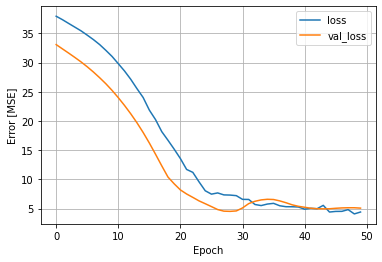

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MSE]')
plt.legend()
plt.grid(True)

In [21]:
#make prediction
y_pred = dnn_model.predict(X_sociodemo_std_test_passed)

#evaluate with groud truth
y_pred_r2 = r2_score(y, y_pred)
y_pred_rsme = mean_squared_error(y, y_pred, squared=False)

print(y_pred_r2)
print(y_pred_rsme)

0.3237871931669297
5.794313610177667
